Consider the following 2-class 2D problem: negative points have coordinates $(-i,0)$, and positive ones have coordinates $(K, (-1)^i \lceil \frac{i}{2}\rceil ) $ both for $i=1,..., N$.

Let $N=10$ and $K=2$ and consider the linear machine given by the extended weight vector $a=(0,10/55,0)$. In other words, your linear discriminant function is $ f(x,y) = \frac{10x}{55} $.

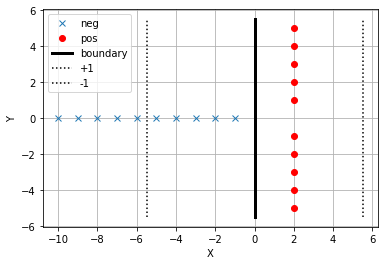

In [57]:
import numpy as np
import matplotlib.pyplot as plt

N = 10
K = 2

a = np.array([[0],[2/11],[0]])  # ext. weight vector (fixed) 

Xp =  np.ones((N,3))  # pos. coordinates
Bp =  np.ones((N,1))  # pos. labels/targets
Xn =  np.ones((N,3))  # neg. coordinates
Bn = -np.ones((N,1))  # neg. labels/targets

for i in range(1,N+1):
    Xn[i-1,1:] = (-i,0)
    Xp[i-1,1:] = (K, np.ceil(i/2)*(-1)**i )
 
###############
plt.plot(Xn[:,1],Xn[:,2],'x',label='neg')
plt.plot(Xp[:,1],Xp[:,2],'ro',label='pos')
yl=plt.ylim()
plt.plot([0,0],yl,'k-',label='boundary',linewidth=3)
plt.plot([5.5,5.5],yl,'k:',label='+1')
plt.plot([-5.5,-5.5],yl,'k:',label='-1')


plt.grid()
plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

The discriminant function is $f(x,y)=10x/55 = 2x/11$. So the boundary is given by $f(x,y)=\frac{2x}{11}=0$ which implies $x=0$ (black vertical line).

Correspondingly, the function reaches $\pm 1$ when $f(x,y) =\frac{2x}{11}= \pm 1$ which implies $x=\frac{\pm 11}{2}$ (dotted vertical lines).

All negative inputs are at the left of the boundary and have negative outputs given by:


In [58]:
outneg = np.matmul(Xn,a)
outneg.T

array([[-0.18181818, -0.36363636, -0.54545455, -0.72727273, -0.90909091,
        -1.09090909, -1.27272727, -1.45454545, -1.63636364, -1.81818182]])

and positive inputs have a unique positive output:

In [59]:
outpos = np.matmul(Xp,a)
outpos.T

array([[0.36363636, 0.36363636, 0.36363636, 0.36363636, 0.36363636,
        0.36363636, 0.36363636, 0.36363636, 0.36363636, 0.36363636]])

Consequently all inputs are correctly classified and the perceptron criterion is zero for the weight vector a

We can plot the outputs (and deviations from targets as lines) against the x coordinate:

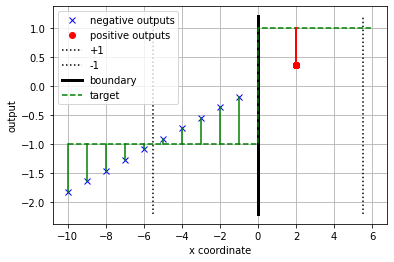

In [60]:
plt.plot(Xn[:,1],outneg,'bx',label='negative outputs')
plt.plot(Xp[:,1],outpos,'ro',label='positive outputs')
yl=[-2.2,1.2]
plt.plot([5.5,5.5],yl,'k:',label='+1')
plt.plot([-5.5,-5.5],yl,'k:',label='-1')
plt.plot([0,0],yl,'k-',label='boundary',linewidth=3)
plt.plot([-10,0,0,6],[-1,-1,1,1],'g--',label='target')

for i in range(N):
    plt.plot([Xn[i,1],Xn[i,1]],[Bn[i,0],outneg[i,0]],'g-')
    plt.plot([Xp[i,1],Xp[i,1]],[Bp[i,0],outpos[i,0]],'r-')

plt.grid()
plt.xlabel('x coordinate')
plt.ylabel('output')
plt.legend(loc='upper left')
plt.show()

The sum of the squared deviations for positives is ten times (4/11 -1) squared which is $10\frac{7^2}{11^2}=\frac{490}{121}=4.05$

In the case of negatives we obtain the expression

$2 \sum_{i=1}^5 (\frac{11-2i}{11})^2 = 2\frac{1+3^2+5^2+7^2+9^2}{11^2} = \frac{2*165}{121} = 2.73$



In [61]:
sumDevNeg = np.sum((outneg-Bn)*(outneg-Bn))
sumDevNeg

2.7272727272727275

In [62]:
sumDevPos = np.sum((outpos-Bp)*(outpos-Bp))
sumDevPos

4.049586776859504

So the LMS criterion is 6.78

In [63]:
LMScriterion = sumDevNeg + sumDevPos
print('LMS criterion for K={} is {}'.format(K,LMScriterion))

LMS criterion for K=2 is 6.776859504132232


The same with a different value of K (you can try several values)

In [66]:
KK = 5
for i in range(1,N+1):
    Xp[i-1,1] = KK

outpos = np.matmul(Xp,a)    
sumDevPos = np.sum((outpos.T-Bp)*(outpos.T-Bp))
LMScriterion1 = sumDevNeg + sumDevPos
print('LMS criterion for K={} is {}'.format(KK,LMScriterion1))

LMS criterion for K=5 is 3.5537190082644616


In fact, the LMS criterion can be written as a function of K as:

$ sumDevNeg + 10 (\frac{2K}{11}-1)^2$

And it is easy to see that this attains a minimum when $K=11/2=5.5$.

To obtain the optimum weight for K=2 we need to write the LMS criterion in terms of the X-weight and the Bias and take derivatives.
(Given the simmetry of the problem we do not need to care about the Y dimension). That is,

$J_s = \sum_{i=1}^{10} (1+w_o-wi)^2 + 10(w_o+2w-1)^2$

Now taking derivatives and equating to zero we have:

$\frac{\partial J_s}{\partial w_o} = 2\sum_{i=1}^{10} (1+w_o-wi) + 20(w_o+2w-1) = 0$

from which we arrive to $4w_o = 7w$. And,

$\frac{\partial J_s}{\partial w} = 2\sum_{i=1}^{10} (1+w_o-wi)(-i) + 20(w_o+2w-1)2 = 0$

from which we obtain the solution $a^* = \frac{5}{97}(7,4,0)$ and we finally conclude that the optimal boundary is at $x=\frac{-7}{4}$

Using the pseudoinverse:

In [67]:
# recover K=2 first
for i in range(1,N+1):
    Xp[i-1,1] = K
X = np.concatenate([Xp,Xn])
B = np.concatenate([Bp,Bn])

# and compute the optimum weight
pInv = np.linalg.pinv(X)
aOpt = np.matmul(pInv,B)
aOpt

array([[ 3.60824742e-01],
       [ 2.06185567e-01],
       [-1.38777878e-17]])

In [68]:
Boundary = -aOpt[0]/aOpt[1]
margin   = 1/aOpt[1] 
(Boundary, margin)

(array([-1.75]), array([4.85]))

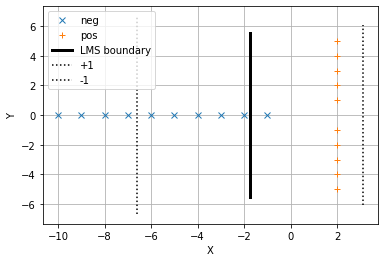

In [70]:
plt.plot(Xn[:,1],Xn[:,2],'x',label='neg')
plt.plot(Xp[:,1],Xp[:,2],'+',label='pos')
plt.plot([Boundary,Boundary],plt.ylim(),'k-',label='LMS boundary',linewidth=3)
plt.plot([Boundary+margin,Boundary+margin],plt.ylim(),'k:',label='+1')
plt.plot([Boundary-margin,Boundary-margin],plt.ylim(),'k:',label='-1')

plt.grid()
plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

Observe that the optimal LMS solution does not correspond to a zero error classifier.

Note that we obtain (approximately) the same solutions through backpropagation

In [12]:
from sklearn.neural_network import MLPRegressor
XX = X[:,1:]
y = B[:,0]

clf = MLPRegressor(hidden_layer_sizes=(), activation='identity', solver='lbfgs',alpha=0,tol=1e-7,max_iter=500)
clf.fit(XX,y)



MLPRegressor(activation='identity', alpha=0, hidden_layer_sizes=(),
             max_iter=500, solver='lbfgs', tol=1e-07)

In [13]:
aBP = np.concatenate([clf.intercepts_[0],clf.coefs_[0][:,0]])[np.newaxis].T
aBP

array([[ 3.60824726e-01],
       [ 2.06185579e-01],
       [-1.22351721e-08]])

In [14]:
clf.loss_

0.11340206185567266

In [74]:
JsCriterion = np.sum(np.square(np.matmul(X,aOpt)-B))
print('The optimal LMS criterion for K={} is {}'.format(K,JsCriterion))

The optimal LMS criterion for K=2 is 4.536082474226804


In [71]:
# Note that the quadratic loss is usually divided by 2 and normalized with respect to the number of examples.
(1/2)*JsCriterion/(2*N)

0.1134020618556701

But, what if we consider a nonlinear activation function together with our linear model?


In [120]:
activationType = 'relu' ########################

clfa = MLPRegressor(hidden_layer_sizes=(1,), activation=activationType, solver='lbfgs',alpha=0,tol=1e-7,max_iter=500)
clfa.fit(XX,y)

aAct = np.concatenate([clfa.intercepts_[0],clfa.coefs_[0][:,0]])[np.newaxis].T
aAct

array([[ 3.00478848e+00],
       [-1.00888154e+00],
       [-6.76947295e-06]])

In [121]:
JsCritA = np.sum(np.square( clfa.predict(XX)-B.ravel()))
print('The optimal LMS criterion for K={} when using {} activation is {}'.format(K,activationType,JsCritA))

The optimal LMS criterion for K=2 when using relu activation is 4.536082474463685


In [122]:
BoundaryA = -aAct[0]/aAct[1]
BoundaryA

array([2.97833626])

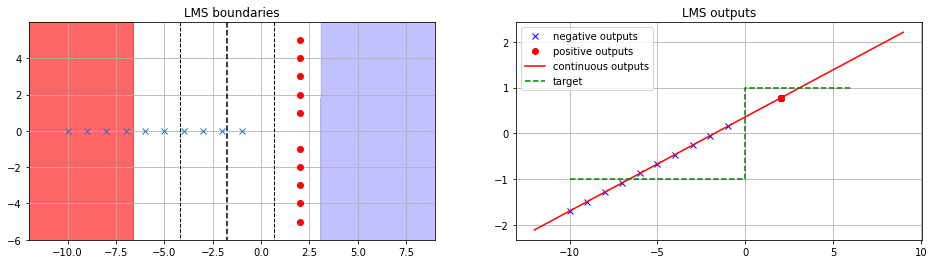

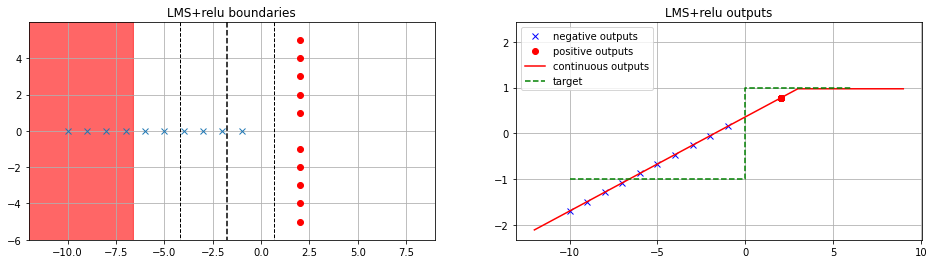

In [123]:
def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    """Plot the margin of an SVM classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    D = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    #D = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = D>1
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z,colors=('w','w','b','b'),alpha=.6) # **params)
    Z = D<-1
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z,colors=('w','w','r','r'),alpha=.6) #**params)
    
    out = ax.contour(xx,yy,D.reshape(xx.shape),linewidths=[.1,1,1.5,1,.1], 
                     linestyles=['-','--','--','--','-'],levels=[-1,-.5,0,.5,1], colors=['r','k','k','k','b'])
    
    return out

xx, yy = make_meshgrid(np.array([-11,8]), XX[:,1])

Fila0 = np.where(np.abs(yy[:,0]-0)<1e-2)[0][0]

fig, [ax1,ax2] = plt.subplots(1, 2 ,num=1,figsize=(16,4))

plot_contours(ax1, clf, xx, yy,cmap=plt.cm.coolwarm, alpha=0.6)
ax1.plot(Xn[:,1],Xn[:,2],'x',label='neg')
ax1.plot(Xp[:,1],Xp[:,2],'ro',label='pos')
ax1.grid()
ax1.set_title('LMS boundaries')

ax2.plot(Xn[:,1],clf.predict(Xn[:,1:]),'bx',label='negative outputs')
ax2.plot(Xp[:,1],clf.predict(Xp[:,1:]),'ro',label='positive outputs')
ax2.plot( xx[Fila0,:].ravel() , clf.predict(np.c_[xx[Fila0,:].ravel(), yy[Fila0,:].ravel()]) ,'r-', label='continuous outputs')


ax2.plot([-10,0,0,6],[-1,-1,1,1],'g--',label='target')
ax2.grid()
ax2.legend()
yl = ax2.get_ylim()
ax2.set_title('LMS outputs')
plt.show()


fig, [ax1,ax2] = plt.subplots(1, 2 ,num=1,figsize=(16,4))

plot_contours(ax1, clfa, xx, yy,cmap=plt.cm.coolwarm, alpha=0.6)
ax1.plot(Xn[:,1],Xn[:,2],'x',label='neg')
ax1.plot(Xp[:,1],Xp[:,2],'ro',label='pos')
ax1.grid()
ax1.set_title('LMS+{} boundaries'.format(activationType))

ax2.plot(Xn[:,1],clfa.predict(Xn[:,1:]),'bx',label='negative outputs')
ax2.plot(Xp[:,1],clfa.predict(Xp[:,1:]),'ro',label='positive outputs')
ax2.plot( xx[Fila0,:].ravel() , clfa.predict(np.c_[xx[Fila0,:].ravel(), yy[Fila0,:].ravel()]) ,'r-', label='continuous outputs')
ax2.plot([-10,0,0,6],[-1,-1,1,1],'g--',label='target')
ax2.legend()
ax2.set_ylim(yl)
ax2.grid()
ax2.set_title('LMS+{} outputs'.format(activationType))
plt.show()


In [125]:
# Try 'relu' after 'tanh'
# Try 'relu' after 'logistic'